In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [3]:
dataset = pd.read_csv(r"C:\Users\ROHEN\OneDrive\Desktop\documents\AI\supervised_learning\polynomial_regression\Position_Salaries.csv")

In [4]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [14]:
x=dataset.iloc[:,1:-1]
y=dataset.iloc[:,-1]

In [15]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [7]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [16]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [17]:
x_pred=lr.predict(x)

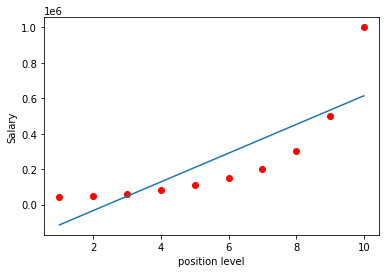

In [10]:
plt.scatter(x,y,color="red")
plt.plot(x,x_pred)
plt.xlabel("position level")
plt.ylabel("Salary")
plt.show()

In [18]:
mean_squared_error(x_pred,y)

26695878787.878788

#### Polynomial Regression

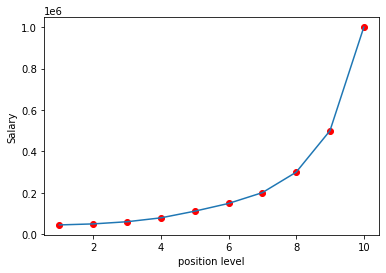

In [21]:
poly_reg=PolynomialFeatures(degree=8)
x_poly= poly_reg.fit_transform(x)
lr2 = LinearRegression()
lr2.fit(x_poly,y)
x_poly_pred=lr2.predict(x_poly)
plt.scatter(x,y,color="red")
plt.plot(x,x_poly_pred)
plt.xlabel("position level")
plt.ylabel("Salary")
plt.show()



In [22]:
mean_squared_error(x_poly_pred,y)

524526.9436503785

In [24]:
lr2.predict(poly_reg.transform([[6.5]]))


array([171303.64839947])

In [30]:
sc = StandardScaler()
y_new=pd.DataFrame(sc.fit_transform(np.array(y).reshape(-1,1)))

In [33]:
X_new=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [34]:
X_new

,Level
0,-1.566699
1,-1.218544
2,-0.870388
3,-0.522233
4,-0.174078
5,0.174078
6,0.522233
7,0.870388
8,1.218544
9,1.566699


In [35]:
y_new

,0
0,-0.720043
1,-0.702438
2,-0.667228
3,-0.596808
4,-0.491178
5,-0.350339
6,-0.174289
7,0.177810
8,0.882008
9,2.642503


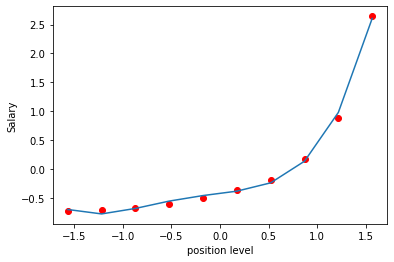

In [40]:
poly_reg=PolynomialFeatures(degree=4)
x_poly= poly_reg.fit_transform(X_new)
lr2 = LinearRegression()
lr2.fit(x_poly,y_new)
x_poly_pred=lr2.predict(x_poly)
plt.scatter(X_new,y_new,color="red")
plt.plot(X_new,x_poly_pred)
plt.xlabel("position level")
plt.ylabel("Salary")
plt.show()

In [42]:
mean_squared_error(y_new,x_poly_pred) #very less mean squared error
#always test score should be greater than train 

0.002607710829338657